<a href="https://colab.research.google.com/github/NabeelAwwad/Multimedia/blob/main/Task1_DCTimageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made by Nabeel Awwad 1160158

Birzeit University, Palestine

# Importing Libraries

In [ ]:
import scipy
from matplotlib import pyplot, pyplot as plt
import numpy as np
import imageio
from numpy import r_
from numpy import pi
from scipy import fftpack

# Display the original image and its matrix

[[[  1   0   0]
  [  2   0   1]
  [  2   0   1]
  ...
  [  0   2   1]
  [  0   2   1]
  [  0   1   0]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 [[  3   3   1]
  [  3   3   1]
  [  3   3   1]
  ...
  [  0   4   0]
  [  0   4   0]
  [  0   4   0]]

 ...

 [[ 62  86  52]
  [ 61  87  52]
  [ 60  86  51]
  ...
  [150 161  82]
  [150 161  82]
  [151 162  83]]

 [[ 61  87  52]
  [ 61  87  52]
  [ 60  86  51]
  ...
  [155 166  87]
  [155 166  87]
  [156 167  88]]

 [[ 61  87  52]
  [ 61  87  52]
  [ 60  86  51]
  ...
  [155 166  87]
  [155 166  87]
  [156 167  88]]]


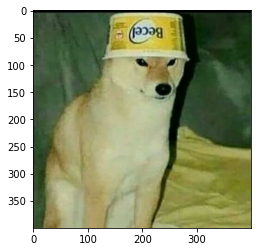

In [ ]:
#change the path to the input image below
img = imageio.imread('https://i.imgur.com/5mwBy6D.jpg')

plt.figure()
plt.imshow(img)

#make the threshold inf to display the entire matrix
np.set_printoptions(threshold=1000)
print(img)

# Turning the image into black and white and displaying the matrix

[[  5   5   5 ...   0   0   0]
 [  0   1   1 ...   0   0   1]
 [  5   5   5 ...   2   2   3]
 ...
 [ 61  61  59 ... 149 149 150]
 [ 61  60  59 ... 155 155 156]
 [ 61  60  59 ... 155 156 157]]


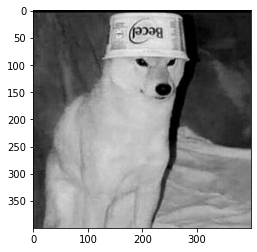

In [ ]:
imageio.imwrite('gray.jpg', img[:, :, 0])
img_gray = imageio.imread('/content/gray.jpg')
plt.figure()
plt.imshow(img_gray, cmap='gray')
np.set_printoptions(threshold=1000)
print(img_gray)

# definition of DCT and inverse DCT functions

In [ ]:
def dct2(a):
    return scipy.fftpack.dct(scipy.fftpack.dct(a, axis=0, norm='ortho'), axis=1, norm='ortho')

def idct2(a):
    return scipy.fftpack.idct(scipy.fftpack.idct(a, axis=0, norm='ortho'), axis=1, norm='ortho')

# Zigzag and inverse zigzag functions

In [ ]:
def zigzag(input):
    # initializing the variables
    # ----------------------------------
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    vmax = input.shape[0]
    hmax = input.shape[1]
    q = 0
    output = np.zeros((vmax * hmax))
    # ----------------------------------
    while (v < vmax) and (h < hmax):
        if ((h + v) % 2) == 0:  # going up
            if v == vmin:
                output[q] = input[v, h]  # if we got to the first line
                if h == hmax:
                    v = v + 1
                else:
                    h = h + 1
                q = q + 1
            elif (h == hmax - 1) and (v < vmax):  # if we got to the last column
                output[q] = input[v, h]
                v = v + 1
                q = q + 1
            elif (v > vmin) and (h < hmax - 1):  # all other cases
                output[q] = input[v, h]
                v = v - 1
                h = h + 1
                q = q + 1
        else:  # going down
            if (v == vmax - 1) and (h <= hmax - 1):  # if we got to the last line
                output[q] = input[v, h]
                h = h + 1
                q = q + 1
            elif h == hmin:  # if we got to the first column
                output[q] = input[v, h]
                if v == vmax - 1:
                    h = h + 1
                else:
                    v = v + 1
                q = q + 1
            elif (v < vmax - 1) and (h > hmin):  # all other cases
                output[q] = input[v, h]
                v = v + 1
                h = h - 1
                q = q + 1
        if (v == vmax - 1) and (h == hmax - 1):  # bottom right element
            output[q] = input[v, h]
            break
    return output

def inverse_zigzag(input, vmax, hmax):
    # initializing the variables
    # ----------------------------------
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    output = np.zeros((vmax, hmax))
    x = 0
    # ----------------------------------
    while (v < vmax) and (h < hmax):
        if ((h + v) % 2) == 0:  # going up
            if v == vmin:
                output[v, h] = input[x]  # if we got to the first line
                if h == hmax:
                    v = v + 1
                else:
                    h = h + 1
                x = x + 1
            elif (h == hmax - 1) and (v < vmax):  # if we got to the last column
                output[v, h] = input[x]
                v = v + 1
                x = x + 1
            elif (v > vmin) and (h < hmax - 1):  # all other cases
                output[v, h] = input[x]
                v = v - 1
                h = h + 1
                x = x + 1
        else:  # going down
            if (v == vmax - 1) and (h <= hmax - 1):  # if we got to the last line
                output[v, h] = input[x]
                h = h + 1
                x = x + 1
            elif h == hmin:  # if we got to the first column
                output[v, h] = input[x]
                if v == vmax - 1:
                    h = h + 1
                else:
                    v = v + 1
                x = x + 1
            elif (v < vmax - 1) and (h > hmin):  # all other cases
                output[v, h] = input[x]
                v = v + 1
                h = h - 1
                x = x + 1
        if (v == vmax - 1) and (h == hmax - 1):  # bottom right element
            output[v, h] = input[x]
            break
    return output

# Dividng the image to blocks, applying DCT and removing elements with zigzag

In [ ]:
# k is the number of cofficients to be set to 0
# b is the length of the block in pixels
k = 250
b = 16
# no need to change anything under this line

imsize = img_gray.shape
dct = np.zeros(imsize)
for i in r_[:imsize[0]:b]:
    for j in r_[:imsize[1]:b]:
        dct[i:(i + b), j:(j + b)] = dct2(img_gray[i:(i + b), j:(j + b)])
        after_zig = zigzag(dct[i:(i + b), j:(j + b)])
        for idx, z in enumerate(after_zig):
            if idx > len(after_zig) - k:
                after_zig[idx] = 0
        dct[i:(i + b), j:(j + b)] = inverse_zigzag(after_zig, b, b)

# Applying inverse DCT

Text(0.5, 1.0, 'Comparison between black & white and DCT compressed image')

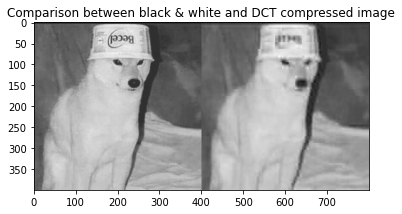

In [ ]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:b]:
    for j in r_[:imsize[1]:b]:
        im_dct[i:(i + b), j:(j + b)] = idct2(dct[i:(i + b), j:(j + b)])

plt.figure()
plt.imshow(np.hstack((img_gray, im_dct)), cmap='gray')
plt.title("Comparison between black & white and DCT compressed image")